# Introduction

### Importing the packages

In [1]:
import arff, itertools,os
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential



Using TensorFlow backend.


### Defining the method for textual represenation of the confusion matrix

In [2]:
def callConfusionMatrixValues(true_target, predicted_target, show):
    cm = confusion_matrix(true_target, predicted_target)
    if show == True:
        print(cm)
        tp, fn, fp, tn = cm.ravel()
        print("True Positive Rate: ", tp)
        print("True Negative Rate: ", tn)
        print("False Negative Rate: ", fn)
        print("False Positive Rate: ", fp)

### Defining the method for graphical representation of the confusion matrix

In [3]:
def callConfusionMatrixGraphical(true_target, predicted_target):
    cm = confusion_matrix(true_target, predicted_target)
    le = preprocessing.LabelEncoder()
    le.fit(true_target)
    np.set_printoptions()
    plt.figure()
    plt.title("Confusion Matrix")
    plt.imshow(cm, "BuGn")
    plt.colorbar()
    plt.tight_layout()
    # Calling the method used to print the numerical values in each cell in the confusion matrix.
    labelingMatrixCells(cm)
    class_labels = np.arange(len(le.classes_))
    plt.xticks(class_labels, ["Phishing", "Legitimate"], rotation = 45)
    plt.yticks(class_labels, ["Phishing", "Legitimate"])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Defining the method to print the numerical values in each cell in the confusion matrix
def labelingMatrixCells(con_mat):
    thresh = con_mat.max() / 2
    for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
        plt.text(j, i, format(con_mat[i, j], 'd'),
        horizontalalignment="center",
        color="white" if con_mat[i, j] > thresh  else "black")

### Defining the method for combined  textual and graphical  representation of the confusion matrix.

In [4]:
def completeConfusionMatrix(true_target, predicted_target, show):    
    print("*************************************")
    print("*                                   *")
    print("*         Confusion Matrix          *")
    print("*                                   *")
    print("*************************************")
    callConfusionMatrixValues(test_target,predicted_target, show)
    callConfusionMatrixGraphical(test_target, predicted_target)

### Defining the method to print the training and test results

In [5]:
def reportGenerator(train_target,train_predicted, test_target, test_predicted):
    print("Results on Training data:")
    print("Accuracy: ",accuracy_score(train_target, train_predicted))
    print(classification_report(train_target, train_predicted, digits=4), "\n")
    print("Results on Testing data:")
    print("Accuracy: ",accuracy_score(test_target, test_predicted))
    print(classification_report(test_target, test_predicted, digits=4))

In [6]:
# Setting the current working directory
os.chdir("I:/DATA-SCIENCE/Insofe/Internship/PhishingWebsites")
print("Current working directory:")
os.getcwd()

Current working directory:


'I:\\DATA-SCIENCE\\Insofe\\Internship\\PhishingWebsites'

### Reading the arff file and modifying it into a dataframe.

In [7]:
# URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00327/Training%20Dataset.arff"
complete_data_arff = arff.load(open('TrainingDataset.arff'))
complete_data = np.array(complete_data_arff['data'])
complete_data = pd.DataFrame(complete_data)
colNames = dict()
for i in range(0,complete_data.shape[1]):
    colNames[i] = (pd.DataFrame(complete_data_arff['attributes']))[0][i]
complete_data = complete_data.rename(columns = colNames)
for colName in complete_data.columns.values:
    complete_data[colName] = complete_data[colName].astype('category',copy=False)

In [8]:
#complete_data.Result = complete_data.Result.astype("category")
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
having_IP_Address              11055 non-null category
URL_Length                     11055 non-null category
Shortining_Service             11055 non-null category
having_At_Symbol               11055 non-null category
double_slash_redirecting       11055 non-null category
Prefix_Suffix                  11055 non-null category
having_Sub_Domain              11055 non-null category
SSLfinal_State                 11055 non-null category
Domain_registeration_length    11055 non-null category
Favicon                        11055 non-null category
port                           11055 non-null category
HTTPS_token                    11055 non-null category
Request_URL                    11055 non-null category
URL_of_Anchor                  11055 non-null category
Links_in_tags                  11055 non-null category
SFH                            11055 non-null category
Submitting_

### Understanding the dimensions and structure of the dataset.

In [9]:
# Displaying the dimensions of the dataset.
print("Dimensions of the dataset is",complete_data.shape[0], "rows and",complete_data.shape[1],"columns\n")

# Displaying the first 5 rows from the dataset.
print("First 5 rows of the dataset is displayed below:")
complete_data.head()

Dimensions of the dataset is 11055 rows and 31 columns

First 5 rows of the dataset is displayed below:


,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Splitting the dataframe into train and test.

In [10]:
result_data = pd.DataFrame(complete_data['Result'])
complete_data = complete_data.drop('Result', axis=1)
train_data, test_data, train_target, test_target = train_test_split(complete_data, result_data, stratify = result_data,
                                                                    test_size=0.3, random_state=12345)

In [11]:
result_data_lw = result_data.Result.value_counts()[1]/(result_data.Result.count())
result_data_pw = result_data.Result.value_counts()[-1]/(result_data.Result.count())
print("**********************Proportion on the give dataset before the split**********************")
print("Percentage of Legitimate websites :", result_data_lw)
print("Percentage of Phishing websites   :", result_data_pw, "\n")

train_target_lw = train_target.Result.value_counts()[1]/(train_target.Result.count())
train_target_pw = train_target.Result.value_counts()[-1]/(train_target.Result.count())
print("**********************Proportion on the Training dataset**********************")
print("Percentage of Legitimate websites :", train_target_lw)
print("Percentage of Phishing websites   :", train_target_pw, "\n")

test_target_lw = test_target.Result.value_counts()[1]/(test_target.Result.count())
test_target_pw = test_target.Result.value_counts()[-1]/(test_target.Result.count())
print("**********************Proportion on the Testing dataset**********************")
print("Percentage of Legitimate websites :", test_target_lw)
print("Percentage of Phishing websites   :", test_target_pw, "\n")


**********************Proportion on the give dataset before the split**********************
Percentage of Legitimate websites : 0.556942559928
Percentage of Phishing websites   : 0.443057440072 

**********************Proportion on the Training dataset**********************
Percentage of Legitimate websites : 0.556991470664
Percentage of Phishing websites   : 0.443008529336 

**********************Proportion on the Testing dataset**********************
Percentage of Legitimate websites : 0.556828459451
Percentage of Phishing websites   : 0.443171540549 



### Displaying the dimensions present in the dataset

In [12]:
print("Dimensions of the complete dataset :",complete_data.shape[0], "rows and",complete_data.shape[1],"columns\n")
print("Dimensions of the training dataset :",train_data.shape[0], "rows and",train_data.shape[1],"columns\n")
print("Dimensions of the testing dataset :",test_data.shape[0], "rows and",test_data.shape[1],"columns\n")


Dimensions of the complete dataset : 11055 rows and 30 columns

Dimensions of the training dataset : 7738 rows and 30 columns

Dimensions of the testing dataset : 3317 rows and 30 columns



In [13]:
# Converting target variables from dataframe to an array
train_target = np.ravel(train_target)
test_target = np.ravel(test_target)

## Feature Selection Process

In [14]:
sel = SelectKBest()
sel.fit(train_data, train_target)

SelectKBest(k=10, score_func=<function f_classif at 0x000001E82AA44488>)

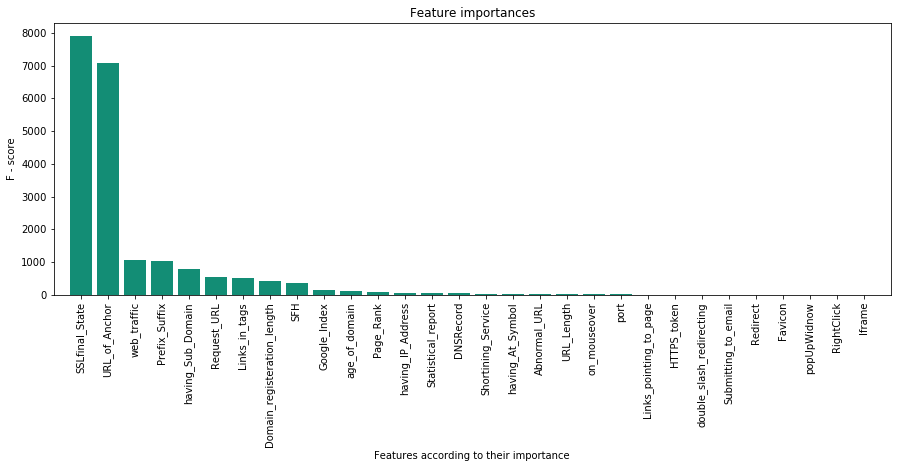

In [15]:
important_features = []
importances = sel.scores_
indices = np.argsort(importances)[::-1]
for f in range(train_data.shape[1]):    
    important_features = np.append(important_features, train_data.columns.values[indices[f]])
    
plt.figure(figsize =(15,5))
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), importances[indices],
       color="#138D75", align="center")
plt.xticks(range(train_data.shape[1]), important_features, rotation = 90)
plt.xlim([-1, train_data.shape[1]])
plt.ylabel('F - score')
plt.xlabel('Features according to their importance')
plt.show()

In [16]:
# Creating train and test dataset using only the important 13 attribute selected based on the ANOVA F-value

imp_features_selected = []
selected_indices = indices[0:13]
for f in range(13):
    imp_features_selected = np.append(imp_features_selected, train_data.columns.values[indices[f]])
train_data_sel = pd.DataFrame(data= train_data,columns=imp_features_selected)
test_data_sel = pd.DataFrame(data= test_data,columns=imp_features_selected)
for colName in train_data_sel.columns.values:
    train_data_sel[colName] = train_data_sel[colName].astype('category',copy=False)

# 1. Logistic Regression Model

### Simple Logistic Regression

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


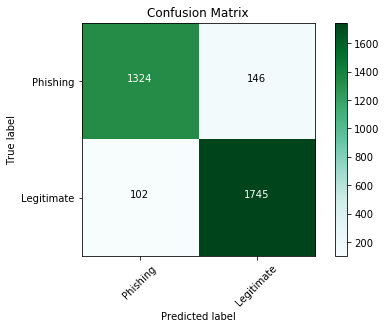

Results on Training data:
Accuracy:  0.929826828638
             precision    recall  f1-score   support

         -1     0.9318    0.9081    0.9198      3428
          1     0.9284    0.9471    0.9376      4310

avg / total     0.9299    0.9298    0.9297      7738
 

Results on Testing data:
Accuracy:  0.92523364486
             precision    recall  f1-score   support

         -1     0.9285    0.9007    0.9144      1470
          1     0.9228    0.9448    0.9337      1847

avg / total     0.9253    0.9252    0.9251      3317



In [17]:
logReg = LogisticRegression(tol=0.0001, random_state= 12345, n_jobs=1)
logRegModel = logReg.fit(train_data, train_target)
pred_logReg_train = logRegModel.predict(train_data)
pred_logReg_test = logRegModel.predict(test_data)
completeConfusionMatrix(test_target, pred_logReg_test, False)

# Error metrics
reportGenerator(train_target, pred_logReg_train, test_target, pred_logReg_test)

### Logistic Regression with Stratified K-fold cross validation.

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


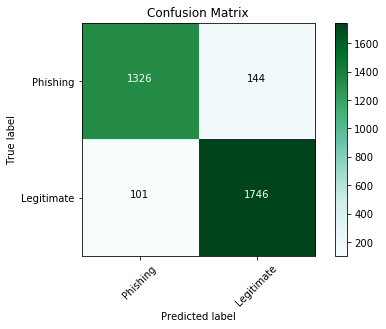

Results on Training data:
Accuracy:  0.930343758077
             precision    recall  f1-score   support

         -1     0.9326    0.9084    0.9203      3428
          1     0.9286    0.9478    0.9381      4310

avg / total     0.9304    0.9303    0.9302      7738
 

Results on Testing data:
Accuracy:  0.926138076575
             precision    recall  f1-score   support

         -1     0.9292    0.9020    0.9154      1470
          1     0.9238    0.9453    0.9344      1847

avg / total     0.9262    0.9261    0.9260      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


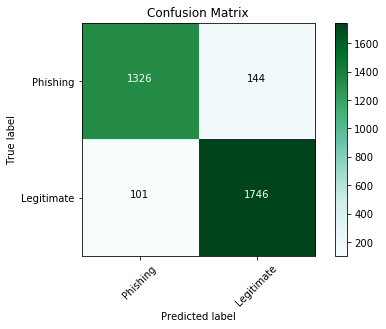

Results on Training data:
Accuracy:  0.930343758077
             precision    recall  f1-score   support

         -1     0.9326    0.9084    0.9203      3428
          1     0.9286    0.9478    0.9381      4310

avg / total     0.9304    0.9303    0.9302      7738
 

Results on Testing data:
Accuracy:  0.926138076575
             precision    recall  f1-score   support

         -1     0.9292    0.9020    0.9154      1470
          1     0.9238    0.9453    0.9344      1847

avg / total     0.9262    0.9261    0.9260      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


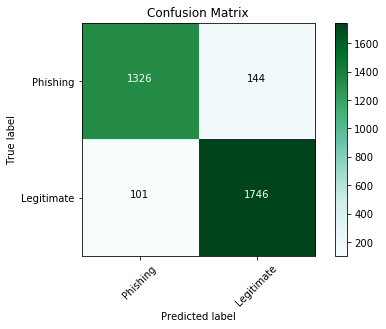

Results on Training data:
Accuracy:  0.930343758077
             precision    recall  f1-score   support

         -1     0.9326    0.9084    0.9203      3428
          1     0.9286    0.9478    0.9381      4310

avg / total     0.9304    0.9303    0.9302      7738
 

Results on Testing data:
Accuracy:  0.926138076575
             precision    recall  f1-score   support

         -1     0.9292    0.9020    0.9154      1470
          1     0.9238    0.9453    0.9344      1847

avg / total     0.9262    0.9261    0.9260      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


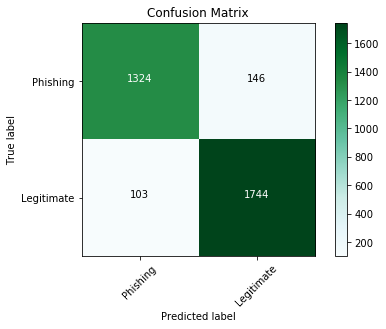

Results on Training data:
Accuracy:  0.929826828638
             precision    recall  f1-score   support

         -1     0.9315    0.9084    0.9198      3428
          1     0.9286    0.9469    0.9376      4310

avg / total     0.9299    0.9298    0.9297      7738
 

Results on Testing data:
Accuracy:  0.924932167621
             precision    recall  f1-score   support

         -1     0.9278    0.9007    0.9140      1470
          1     0.9228    0.9442    0.9334      1847

avg / total     0.9250    0.9249    0.9248      3317



In [18]:
for i, c in enumerate((20, 10, 5, 2)):
    logReg_CV = LogisticRegressionCV(cv=c, dual=False, tol=0.0001, random_state= 123, n_jobs=1)
    logReg_CV_model = logReg_CV.fit(train_data, train_target)
    pred_logReg_CV_train = logReg_CV_model.predict(train_data)
    pred_logReg_CV_test = logReg_CV_model.predict(test_data)
    completeConfusionMatrix(test_target, pred_logReg_CV_test, False)
    # Error metrics
    reportGenerator(train_target, pred_logReg_CV_train, test_target, pred_logReg_CV_test)

### Logistic Regression with L1 regularization

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


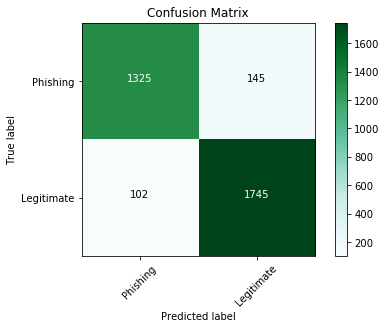

Results on Training data:
Accuracy:  0.929956060998
             precision    recall  f1-score   support

         -1     0.9320    0.9081    0.9199      3428
          1     0.9284    0.9473    0.9378      4310

avg / total     0.9300    0.9300    0.9299      7738
 

Results on Testing data:
Accuracy:  0.925535122098
             precision    recall  f1-score   support

         -1     0.9285    0.9014    0.9147      1470
          1     0.9233    0.9448    0.9339      1847

avg / total     0.9256    0.9255    0.9254      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


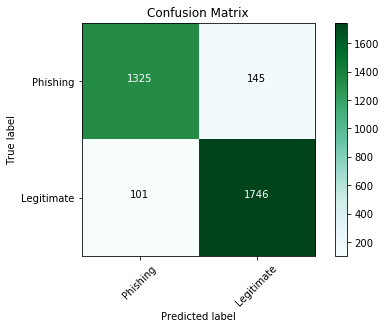

Results on Training data:
Accuracy:  0.929956060998
             precision    recall  f1-score   support

         -1     0.9320    0.9081    0.9199      3428
          1     0.9284    0.9473    0.9378      4310

avg / total     0.9300    0.9300    0.9299      7738
 

Results on Testing data:
Accuracy:  0.925836599337
             precision    recall  f1-score   support

         -1     0.9292    0.9014    0.9151      1470
          1     0.9233    0.9453    0.9342      1847

avg / total     0.9259    0.9258    0.9257      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


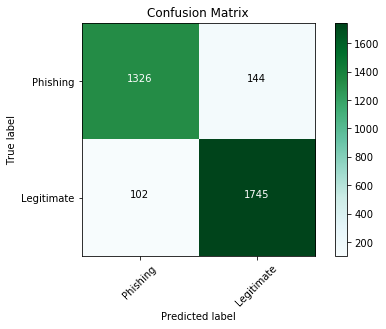

Results on Training data:
Accuracy:  0.929568363918
             precision    recall  f1-score   support

         -1     0.9309    0.9084    0.9195      3428
          1     0.9285    0.9464    0.9374      4310

avg / total     0.9296    0.9296    0.9295      7738
 

Results on Testing data:
Accuracy:  0.925836599337
             precision    recall  f1-score   support

         -1     0.9286    0.9020    0.9151      1470
          1     0.9238    0.9448    0.9342      1847

avg / total     0.9259    0.9258    0.9257      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


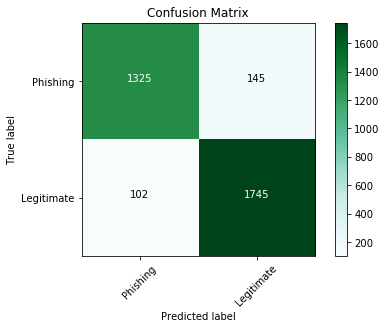

Results on Training data:
Accuracy:  0.929956060998
             precision    recall  f1-score   support

         -1     0.9318    0.9084    0.9199      3428
          1     0.9286    0.9471    0.9377      4310

avg / total     0.9300    0.9300    0.9299      7738
 

Results on Testing data:
Accuracy:  0.925535122098
             precision    recall  f1-score   support

         -1     0.9285    0.9014    0.9147      1470
          1     0.9233    0.9448    0.9339      1847

avg / total     0.9256    0.9255    0.9254      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


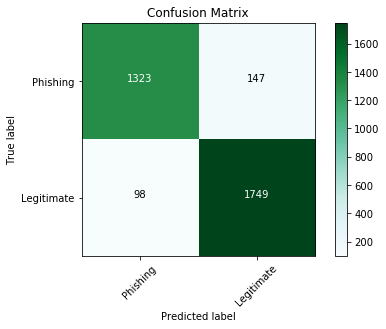

Results on Training data:
Accuracy:  0.930343758077
             precision    recall  f1-score   support

         -1     0.9334    0.9075    0.9203      3428
          1     0.9280    0.9485    0.9382      4310

avg / total     0.9304    0.9303    0.9302      7738
 

Results on Testing data:
Accuracy:  0.926138076575
             precision    recall  f1-score   support

         -1     0.9310    0.9000    0.9153      1470
          1     0.9225    0.9469    0.9345      1847

avg / total     0.9263    0.9261    0.9260      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


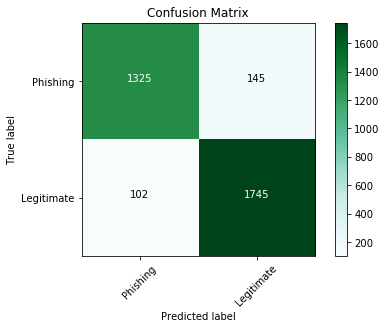

Results on Training data:
Accuracy:  0.929956060998
             precision    recall  f1-score   support

         -1     0.9318    0.9084    0.9199      3428
          1     0.9286    0.9471    0.9377      4310

avg / total     0.9300    0.9300    0.9299      7738
 

Results on Testing data:
Accuracy:  0.925535122098
             precision    recall  f1-score   support

         -1     0.9285    0.9014    0.9147      1470
          1     0.9233    0.9448    0.9339      1847

avg / total     0.9256    0.9255    0.9254      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


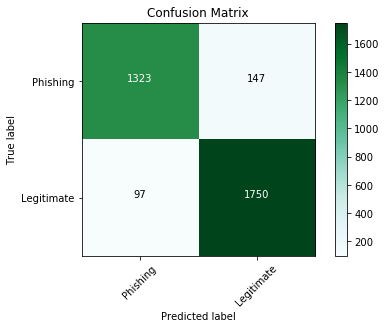

Results on Training data:
Accuracy:  0.930214525717
             precision    recall  f1-score   support

         -1     0.9344    0.9061    0.9200      3428
          1     0.9271    0.9494    0.9381      4310

avg / total     0.9303    0.9302    0.9301      7738
 

Results on Testing data:
Accuracy:  0.926439553814
             precision    recall  f1-score   support

         -1     0.9317    0.9000    0.9156      1470
          1     0.9225    0.9475    0.9348      1847

avg / total     0.9266    0.9264    0.9263      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


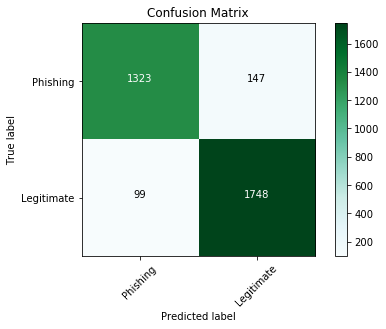

Results on Training data:
Accuracy:  0.930214525717
             precision    recall  f1-score   support

         -1     0.9339    0.9067    0.9201      3428
          1     0.9274    0.9490    0.9381      4310

avg / total     0.9303    0.9302    0.9301      7738
 

Results on Testing data:
Accuracy:  0.925836599337
             precision    recall  f1-score   support

         -1     0.9304    0.9000    0.9149      1470
          1     0.9224    0.9464    0.9343      1847

avg / total     0.9260    0.9258    0.9257      3317



In [19]:
for i, c in enumerate((0.8, 0.6, 0.4, 0.3, 0.2, 0.25, 0.1, 0.15)):
    logReg_l1 = LogisticRegression(penalty= 'l1', C = c, dual=False, tol=0.0001, random_state= 123, n_jobs=1)
    logReg_l1_model = logReg_l1.fit(train_data, train_target)
    pred_logReg_l1_train = logReg_l1_model.predict(train_data)
    pred_logReg_l1_test = logReg_l1_model.predict(test_data)
    completeConfusionMatrix(test_target, pred_logReg_l1_test, False)
    # Error metrics
    reportGenerator(train_target, pred_logReg_l1_train, test_target, pred_logReg_l1_test)

### Logistic Regression with L2 regularization

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


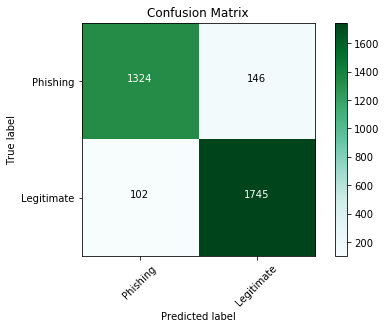

Results on Training data:
Accuracy:  0.929826828638
             precision    recall  f1-score   support

         -1     0.9318    0.9081    0.9198      3428
          1     0.9284    0.9471    0.9376      4310

avg / total     0.9299    0.9298    0.9297      7738
 

Results on Testing data:
Accuracy:  0.92523364486
             precision    recall  f1-score   support

         -1     0.9285    0.9007    0.9144      1470
          1     0.9228    0.9448    0.9337      1847

avg / total     0.9253    0.9252    0.9251      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


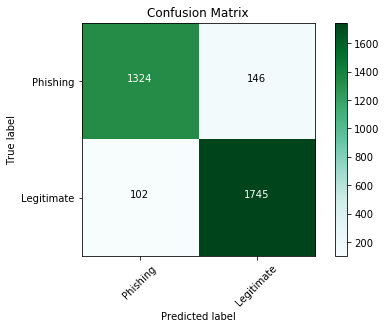

Results on Training data:
Accuracy:  0.929826828638
             precision    recall  f1-score   support

         -1     0.9318    0.9081    0.9198      3428
          1     0.9284    0.9471    0.9376      4310

avg / total     0.9299    0.9298    0.9297      7738
 

Results on Testing data:
Accuracy:  0.92523364486
             precision    recall  f1-score   support

         -1     0.9285    0.9007    0.9144      1470
          1     0.9228    0.9448    0.9337      1847

avg / total     0.9253    0.9252    0.9251      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


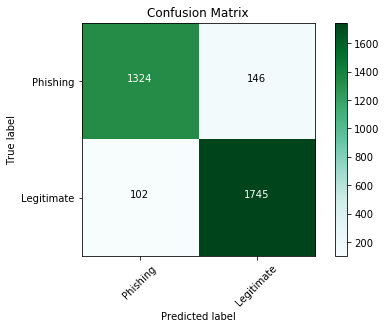

Results on Training data:
Accuracy:  0.929956060998
             precision    recall  f1-score   support

         -1     0.9320    0.9081    0.9199      3428
          1     0.9284    0.9473    0.9378      4310

avg / total     0.9300    0.9300    0.9299      7738
 

Results on Testing data:
Accuracy:  0.92523364486
             precision    recall  f1-score   support

         -1     0.9285    0.9007    0.9144      1470
          1     0.9228    0.9448    0.9337      1847

avg / total     0.9253    0.9252    0.9251      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


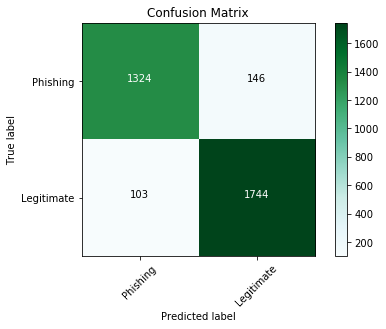

Results on Training data:
Accuracy:  0.929568363918
             precision    recall  f1-score   support

         -1     0.9312    0.9081    0.9195      3428
          1     0.9283    0.9466    0.9374      4310

avg / total     0.9296    0.9296    0.9295      7738
 

Results on Testing data:
Accuracy:  0.924932167621
             precision    recall  f1-score   support

         -1     0.9278    0.9007    0.9140      1470
          1     0.9228    0.9442    0.9334      1847

avg / total     0.9250    0.9249    0.9248      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


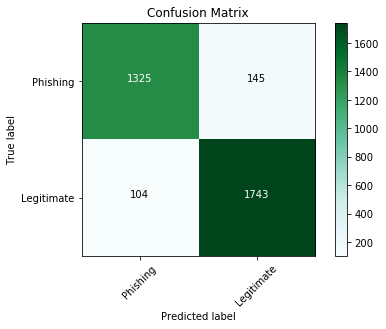

Results on Training data:
Accuracy:  0.929826828638
             precision    recall  f1-score   support

         -1     0.9312    0.9087    0.9198      3428
          1     0.9288    0.9466    0.9376      4310

avg / total     0.9299    0.9298    0.9297      7738
 

Results on Testing data:
Accuracy:  0.924932167621
             precision    recall  f1-score   support

         -1     0.9272    0.9014    0.9141      1470
          1     0.9232    0.9437    0.9333      1847

avg / total     0.9250    0.9249    0.9248      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


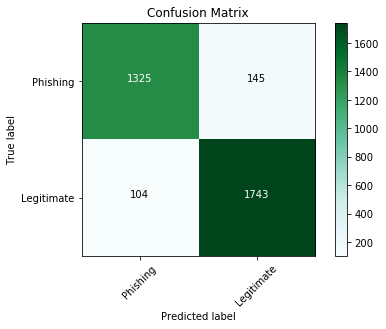

Results on Training data:
Accuracy:  0.929956060998
             precision    recall  f1-score   support

         -1     0.9313    0.9090    0.9200      3428
          1     0.9290    0.9466    0.9377      4310

avg / total     0.9300    0.9300    0.9299      7738
 

Results on Testing data:
Accuracy:  0.924932167621
             precision    recall  f1-score   support

         -1     0.9272    0.9014    0.9141      1470
          1     0.9232    0.9437    0.9333      1847

avg / total     0.9250    0.9249    0.9248      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


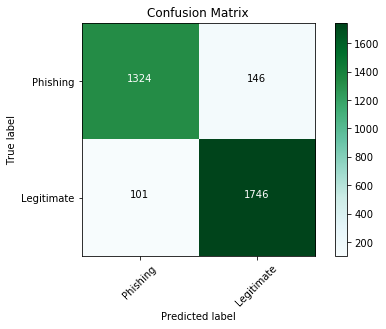

Results on Training data:
Accuracy:  0.929568363918
             precision    recall  f1-score   support

         -1     0.9312    0.9081    0.9195      3428
          1     0.9283    0.9466    0.9374      4310

avg / total     0.9296    0.9296    0.9295      7738
 

Results on Testing data:
Accuracy:  0.925535122098
             precision    recall  f1-score   support

         -1     0.9291    0.9007    0.9147      1470
          1     0.9228    0.9453    0.9339      1847

avg / total     0.9256    0.9255    0.9254      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


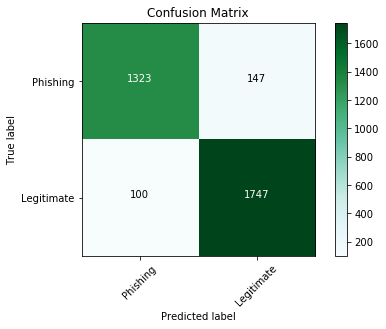

Results on Training data:
Accuracy:  0.929309899199
             precision    recall  f1-score   support

         -1     0.9322    0.9064    0.9191      3428
          1     0.9271    0.9476    0.9372      4310

avg / total     0.9294    0.9293    0.9292      7738
 

Results on Testing data:
Accuracy:  0.925535122098
             precision    recall  f1-score   support

         -1     0.9297    0.9000    0.9146      1470
          1     0.9224    0.9459    0.9340      1847

avg / total     0.9256    0.9255    0.9254      3317



In [20]:
for i, c in enumerate((1, 0.9, 0.8, 0.6, 0.4, 0.3, 0.2, 0.1)):
    logReg_l2 = LogisticRegression(penalty= 'l2', C = c, dual=False, tol=0.0001, random_state= 123, n_jobs=1)
    logReg_l2_model = logReg_l2.fit(train_data, train_target)
    pred_logReg_l2_train = logReg_l2_model.predict(train_data)
    pred_logReg_l2_test = logReg_l2_model.predict(test_data)
    completeConfusionMatrix(test_target, pred_logReg_l2_test, False)
    # Error metrics
    reportGenerator(train_target, pred_logReg_l2_train, test_target, pred_logReg_l2_test)

### Logistic Regression with the 13 important features selected from  ANOVA F-value

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


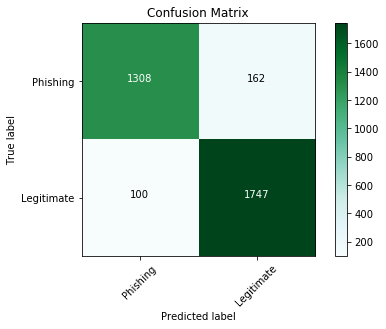

Results on Training data:
Accuracy:  0.923106745929
             precision    recall  f1-score   support

         -1     0.9278    0.8961    0.9117      3428
          1     0.9196    0.9445    0.9319      4310

avg / total     0.9232    0.9231    0.9230      7738
 

Results on Testing data:
Accuracy:  0.921012963521
             precision    recall  f1-score   support

         -1     0.9290    0.8898    0.9090      1470
          1     0.9151    0.9459    0.9302      1847

avg / total     0.9213    0.9210    0.9208      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


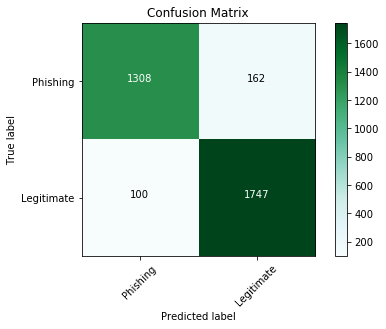

Results on Training data:
Accuracy:  0.923106745929
             precision    recall  f1-score   support

         -1     0.9278    0.8961    0.9117      3428
          1     0.9196    0.9445    0.9319      4310

avg / total     0.9232    0.9231    0.9230      7738
 

Results on Testing data:
Accuracy:  0.921012963521
             precision    recall  f1-score   support

         -1     0.9290    0.8898    0.9090      1470
          1     0.9151    0.9459    0.9302      1847

avg / total     0.9213    0.9210    0.9208      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


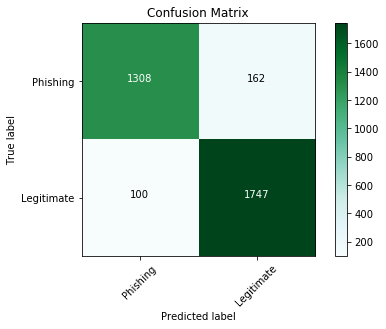

Results on Training data:
Accuracy:  0.923106745929
             precision    recall  f1-score   support

         -1     0.9278    0.8961    0.9117      3428
          1     0.9196    0.9445    0.9319      4310

avg / total     0.9232    0.9231    0.9230      7738
 

Results on Testing data:
Accuracy:  0.921012963521
             precision    recall  f1-score   support

         -1     0.9290    0.8898    0.9090      1470
          1     0.9151    0.9459    0.9302      1847

avg / total     0.9213    0.9210    0.9208      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


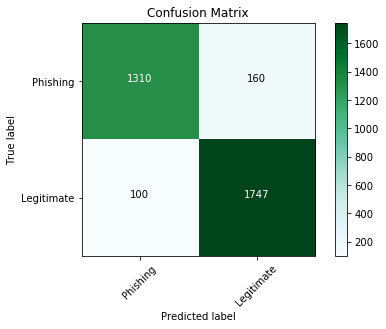

Results on Training data:
Accuracy:  0.923106745929
             precision    recall  f1-score   support

         -1     0.9278    0.8961    0.9117      3428
          1     0.9196    0.9445    0.9319      4310

avg / total     0.9232    0.9231    0.9230      7738
 

Results on Testing data:
Accuracy:  0.921615917998
             precision    recall  f1-score   support

         -1     0.9291    0.8912    0.9097      1470
          1     0.9161    0.9459    0.9307      1847

avg / total     0.9219    0.9216    0.9214      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


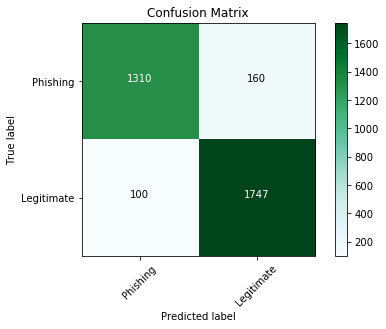

Results on Training data:
Accuracy:  0.92284828121
             precision    recall  f1-score   support

         -1     0.9273    0.8961    0.9114      3428
          1     0.9195    0.9441    0.9317      4310

avg / total     0.9230    0.9228    0.9227      7738
 

Results on Testing data:
Accuracy:  0.921615917998
             precision    recall  f1-score   support

         -1     0.9291    0.8912    0.9097      1470
          1     0.9161    0.9459    0.9307      1847

avg / total     0.9219    0.9216    0.9214      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


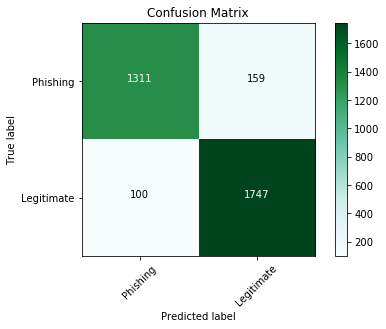

Results on Training data:
Accuracy:  0.92258981649
             precision    recall  f1-score   support

         -1     0.9270    0.8959    0.9111      3428
          1     0.9193    0.9439    0.9314      4310

avg / total     0.9227    0.9226    0.9224      7738
 

Results on Testing data:
Accuracy:  0.921917395237
             precision    recall  f1-score   support

         -1     0.9291    0.8918    0.9101      1470
          1     0.9166    0.9459    0.9310      1847

avg / total     0.9221    0.9219    0.9217      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


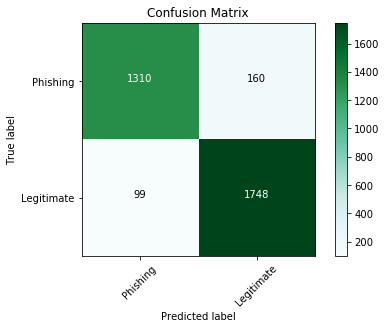

Results on Training data:
Accuracy:  0.92258981649
             precision    recall  f1-score   support

         -1     0.9280    0.8947    0.9110      3428
          1     0.9186    0.9448    0.9315      4310

avg / total     0.9227    0.9226    0.9224      7738
 

Results on Testing data:
Accuracy:  0.921917395237
             precision    recall  f1-score   support

         -1     0.9297    0.8912    0.9100      1470
          1     0.9161    0.9464    0.9310      1847

avg / total     0.9222    0.9219    0.9217      3317



In [21]:
for i, c in enumerate((0.9, 0.8, 0.6, 0.4, 0.3, 0.2, 0.1)): 
    logRegSel = LogisticRegression(penalty= 'l1', C = c, tol=0.0001, random_state= 123, n_jobs=1)
    logRegSelModel = logRegSel.fit(train_data_sel, train_target)
    pred_logRegSel_train = logRegSelModel.predict(train_data_sel)
    pred_logRegSel_test = logRegSelModel.predict(test_data_sel)
    completeConfusionMatrix(test_target, pred_logRegSel_test, False)

    # Error metrics
    reportGenerator(train_target, pred_logRegSel_train, test_target, pred_logRegSel_test)

# 2. Decision Tree Model

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


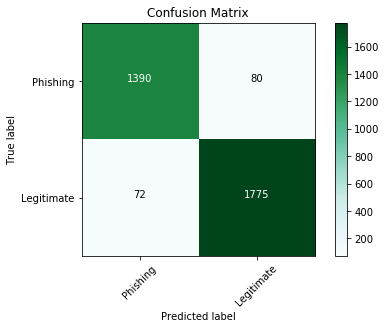

Results on Training data:
Accuracy:  0.985267510985
             precision    recall  f1-score   support

         -1     0.9839    0.9828    0.9834      3428
          1     0.9863    0.9872    0.9868      4310

avg / total     0.9853    0.9853    0.9853      7738
 

Results on Testing data:
Accuracy:  0.954175459753
             precision    recall  f1-score   support

         -1     0.9508    0.9456    0.9482      1470
          1     0.9569    0.9610    0.9589      1847

avg / total     0.9542    0.9542    0.9542      3317



In [22]:
dt = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, presort=False, 
                                 random_state=123, splitter='best')
dt =dt.fit(train_data, train_target)
prediction_dt_train = dt.predict(train_data)
prediction_dt_test = dt.predict(test_data)
completeConfusionMatrix(test_target, prediction_dt_test, False)

# Error metrics
reportGenerator(train_target, prediction_dt_train, test_target, prediction_dt_test)

### Plotting Feature importance with Decision Tree model

1. SSLfinal_State  (0.622179)
2. URL_of_Anchor  (0.117256)
3. Links_in_tags  (0.036394)
4. web_traffic  (0.029622)
5. having_Sub_Domain  (0.027317)
6. Prefix_Suffix  (0.025085)
7. Links_pointing_to_page  (0.020975)
8. Request_URL  (0.015369)
9. SFH  (0.012364)
10. age_of_domain  (0.010502)
11. DNSRecord  (0.009654)
12. Google_Index  (0.009647)
13. Page_Rank  (0.009284)
14. having_IP_Address  (0.009177)
15. Domain_registeration_length  (0.007949)
16. Submitting_to_email  (0.007498)
17. on_mouseover  (0.004612)
18. Redirect  (0.003860)
19. URL_Length  (0.003391)
20. Statistical_report  (0.002984)
21. Abnormal_URL  (0.002816)
22. RightClick  (0.002147)
23. port  (0.001932)
24. HTTPS_token  (0.001873)
25. Shortining_Service  (0.001634)
26. popUpWidnow  (0.001340)
27. having_At_Symbol  (0.001114)
28. Iframe  (0.000941)
29. Favicon  (0.000922)
30. double_slash_redirecting  (0.000161)


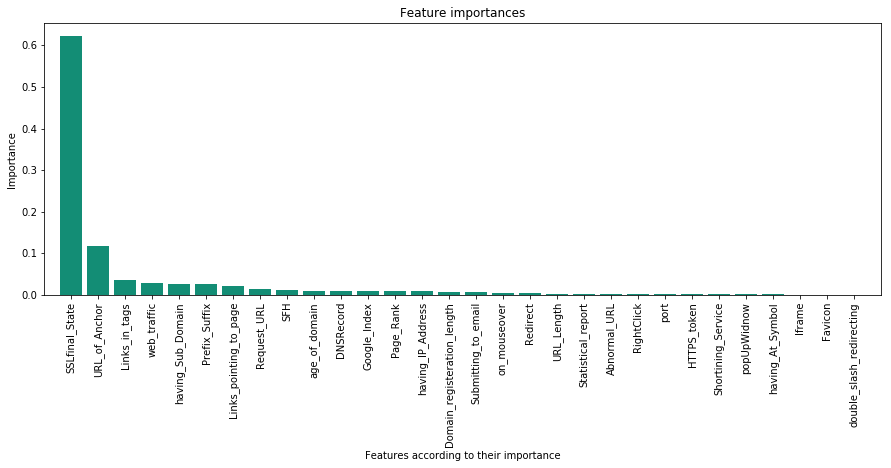

In [23]:
important_features = []
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(train_data.shape[1]):
    print("%d. %s  (%f)" % (f+1, train_data.columns.values[indices[f]], importances[indices[f]]))
    important_features = np.append(important_features, train_data.columns.values[indices[f]])
plt.figure(figsize =(15,5))
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), importances[indices],
       color="#138D75", align="center")
plt.xticks(range(train_data.shape[1]), important_features, rotation = 90)
plt.xlim([-1, train_data.shape[1]])
plt.ylabel('Importance')
plt.xlabel('Features according to their importance')
plt.show()

### Decision Tree with the 13 important features selected from ANOVA F-value


*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


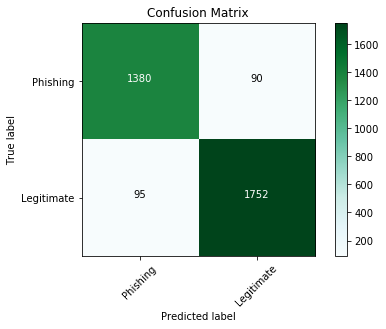

Results on Training data:
Accuracy:  0.974670457483
             precision    recall  f1-score   support

         -1     0.9703    0.9726    0.9714      3428
          1     0.9781    0.9763    0.9772      4310

avg / total     0.9747    0.9747    0.9747      7738
 

Results on Testing data:
Accuracy:  0.944226710883
             precision    recall  f1-score   support

         -1     0.9356    0.9388    0.9372      1470
          1     0.9511    0.9486    0.9499      1847

avg / total     0.9443    0.9442    0.9442      3317



In [24]:
dt = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, presort=False, 
                                 random_state=123, splitter='best')
dt =dt.fit(train_data_sel, train_target)
prediction_dt_train_sel = dt.predict(train_data_sel)
prediction_dt_test_sel = dt.predict(test_data_sel)
completeConfusionMatrix(test_target, prediction_dt_test_sel, False)

# Error metrics
reportGenerator(train_target, prediction_dt_train_sel, test_target, prediction_dt_test_sel)

# 3. RandomForest Model

### Creating a RandomForest model with Cross validation

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


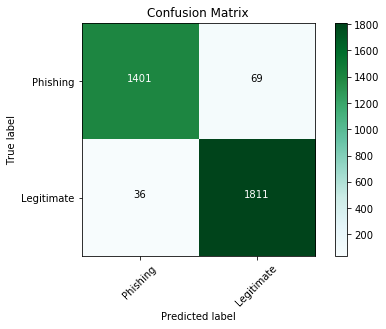

Results on Training data:
Accuracy:  0.989919875937
             precision    recall  f1-score   support

         -1     0.9941    0.9831    0.9886      3428
          1     0.9867    0.9954    0.9910      4310

avg / total     0.9900    0.9899    0.9899      7738
 

Results on Testing data:
Accuracy:  0.968344889961
             precision    recall  f1-score   support

         -1     0.9749    0.9531    0.9639      1470
          1     0.9633    0.9805    0.9718      1847

avg / total     0.9685    0.9683    0.9683      3317



In [25]:
parameter_value = [
  {'n_estimators': [28, 30, 32], 'max_features': [2], 'max_depth': [22, 29], 'min_samples_leaf':[1],
  'oob_score' : [True]}
]
rf_grid = GridSearchCV(estimator= RandomForestClassifier(),param_grid=parameter_value, n_jobs=-1, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50))
rf_grid.fit(train_data,train_target) 
prediction_rf_train = rf_grid.predict(train_data)
prediction_rf_test = rf_grid.predict(test_data)
completeConfusionMatrix(test_target, prediction_rf_test, False)

# Error metrics
reportGenerator(train_target, prediction_rf_train, test_target, prediction_rf_test)

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


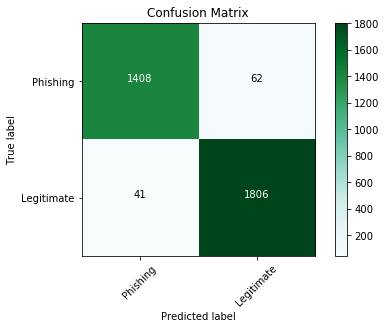

In [26]:
# RandomForest Model
X = train_data
Y = train_target
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=29, max_features=2, max_leaf_nodes=None,
min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1, oob_score=True, random_state=123,
verbose=0, warm_start=False)
prediction_randomForest_train = model.fit(train_data,train_target).predict(train_data)
prediction_randomForest_test = model.fit(train_data,train_target).predict(test_data)
completeConfusionMatrix(test_target,prediction_randomForest_test, False)

In [27]:
print(rf_grid.best_estimator_ )


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=22, max_features=2, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=28, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


### Ranking the features based on their importance in the forest.

In [28]:
important_features = []
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("*************************************")
print("*                                   *")
print("*      Ranking of the features      *")
print("*                                   *")
print("*************************************")
for f in range(train_data.shape[1]):
    print("%d. %s (%f)" % (f+1, train_data.columns.values[indices[f]], importances[indices[f]]))
    important_features = np.append(important_features, train_data.columns.values[indices[f]])

*************************************
*                                   *
*      Ranking of the features      *
*                                   *
*************************************
1. SSLfinal_State (0.268968)
2. URL_of_Anchor (0.211928)
3. web_traffic (0.075466)
4. having_Sub_Domain (0.071872)
5. Links_in_tags (0.054317)
6. Prefix_Suffix (0.041842)
7. Request_URL (0.026254)
8. SFH (0.025278)
9. Links_pointing_to_page (0.023914)
10. Domain_registeration_length (0.020534)
11. age_of_domain (0.018674)
12. having_IP_Address (0.018316)
13. Google_Index (0.016843)
14. DNSRecord (0.016837)
15. Page_Rank (0.015634)
16. URL_Length (0.011526)
17. Statistical_report (0.007719)
18. popUpWidnow (0.007631)
19. having_At_Symbol (0.007590)
20. Redirect (0.007338)
21. Shortining_Service (0.007057)
22. HTTPS_token (0.006738)
23. Submitting_to_email (0.006583)
24. Abnormal_URL (0.005910)
25. double_slash_redirecting (0.005557)
26. Favicon (0.005281)
27. on_mouseover (0.004972)
28. port (0.00357

### Plotting Feature importance with Random Forest model

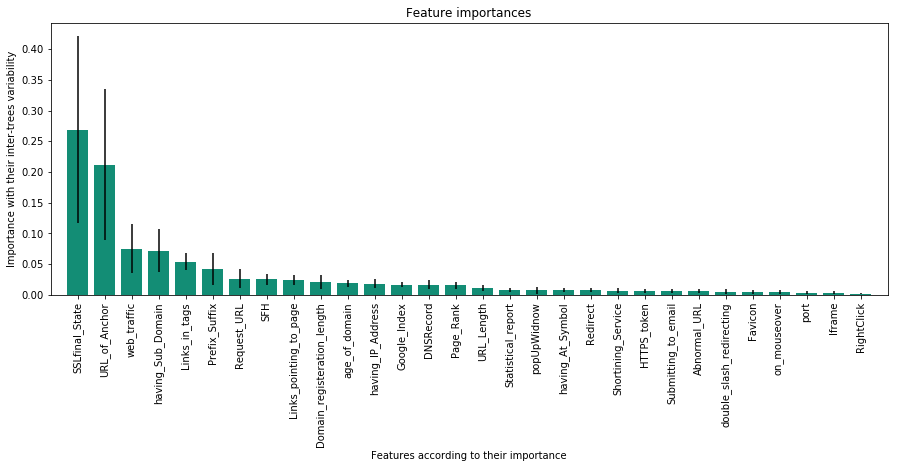

In [29]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
plt.figure(figsize =(15,5))
plt.title("Feature importances")
plt.bar(range(train_data.shape[1]), importances[indices],
       color="#138D75", yerr=std[indices], align="center")
plt.xticks(range(train_data.shape[1]), important_features, rotation = 90)
plt.xlim([-1, train_data.shape[1]])
plt.ylabel('Importance with their inter-trees variability')
plt.xlabel('Features according to their importance')
plt.show()

In [30]:
callConfusionMatrixValues(test_target,prediction_randomForest_test, False)
# Error metrics
reportGenerator(train_target, prediction_randomForest_train, test_target, prediction_randomForest_test)

Results on Training data:
Accuracy:  0.990307573016
             precision    recall  f1-score   support

         -1     0.9915    0.9866    0.9890      3428
          1     0.9894    0.9933    0.9913      4310

avg / total     0.9903    0.9903    0.9903      7738
 

Results on Testing data:
Accuracy:  0.968947844438
             precision    recall  f1-score   support

         -1     0.9717    0.9578    0.9647      1470
          1     0.9668    0.9778    0.9723      1847

avg / total     0.9690    0.9689    0.9689      3317



### Random Forest Model by selecting only the 13 important variables.

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


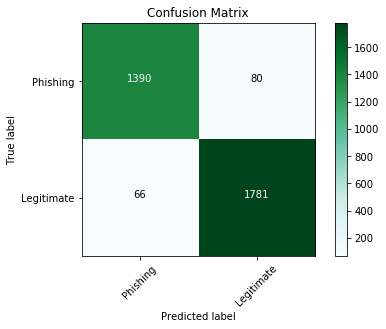

Results on Training data:
Accuracy:  0.975575084001
             precision    recall  f1-score   support

         -1     0.9745    0.9702    0.9724      3428
          1     0.9764    0.9798    0.9781      4310

avg / total     0.9756    0.9756    0.9756      7738
 

Results on Testing data:
Accuracy:  0.955984323184
             precision    recall  f1-score   support

         -1     0.9547    0.9456    0.9501      1470
          1     0.9570    0.9643    0.9606      1847

avg / total     0.9560    0.9560    0.9560      3317



In [31]:
# RandomForest Model
X = train_data
Y = train_target
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=29, max_features=2, max_leaf_nodes=None,
min_impurity_split=1e-07, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1, oob_score=True, random_state=123,
verbose=0, warm_start=False)
prediction_rf_imp_train = model.fit(train_data_sel,train_target).predict(train_data_sel)
prediction_rf_imp_test = model.fit(train_data_sel,train_target).predict(test_data_sel)
completeConfusionMatrix(test_target,prediction_rf_imp_test, False)
# Error metrics
reportGenerator(train_target, prediction_rf_imp_train, test_target, prediction_rf_imp_test)

# 4. Naive Bayes Model

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


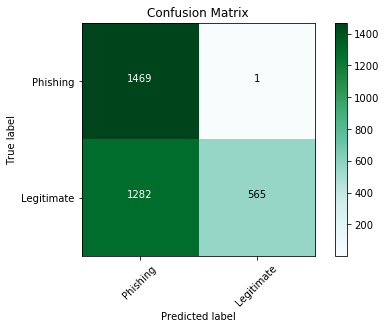

Results on Training data:
Accuracy:  0.598862755234
             precision    recall  f1-score   support

         -1     0.5248    0.9982    0.6880      3428
          1     0.9951    0.2812    0.4385      4310

avg / total     0.7868    0.5989    0.5490      7738
 

Results on Testing data:
Accuracy:  0.613204703045
             precision    recall  f1-score   support

         -1     0.5340    0.9993    0.6960      1470
          1     0.9982    0.3059    0.4683      1847

avg / total     0.7925    0.6132    0.5692      3317



In [32]:
# Naive Bayes Model: Gaussian Naive Bayes
gnb = GaussianNB()
prediction_NaiveBayes_train = gnb.fit(train_data, train_target).predict(train_data)
prediction_NaiveBayes_test = gnb.fit(train_data, train_target).predict(test_data)
completeConfusionMatrix(test_target, prediction_NaiveBayes_test, False)
# Error metrics
reportGenerator(train_target, prediction_NaiveBayes_train, test_target, prediction_NaiveBayes_test)

### Naive Bayes model with the 13 important features selected from ANOVA F-value

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


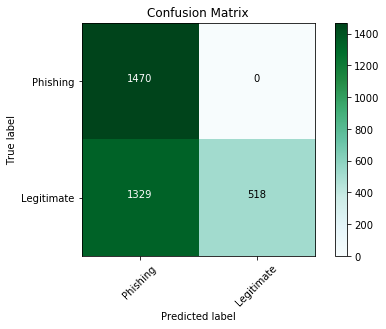

Results on Training data:
Accuracy:  0.590721116568
             precision    recall  f1-score   support

         -1     0.5198    1.0000    0.6840      3428
          1     1.0000    0.2652    0.4192      4310

avg / total     0.7873    0.5907    0.5365      7738
 

Results on Testing data:
Accuracy:  0.599336750075
             precision    recall  f1-score   support

         -1     0.5252    1.0000    0.6887      1470
          1     1.0000    0.2805    0.4381      1847

avg / total     0.7896    0.5993    0.5491      3317



In [33]:
gnb2 = GaussianNB()
prediction_gnb2_train = gnb2.fit(train_data_sel, train_target).predict(train_data_sel)
prediction_gnb2_test = gnb2.fit(train_data_sel, train_target).predict(test_data_sel)
completeConfusionMatrix(test_target, prediction_gnb2_test, False)
# Error metrics
reportGenerator(train_target, prediction_gnb2_train, test_target, prediction_gnb2_test)

# 5. KNN Classifier

### K-NN Classifier with distance as Manhattan distance

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


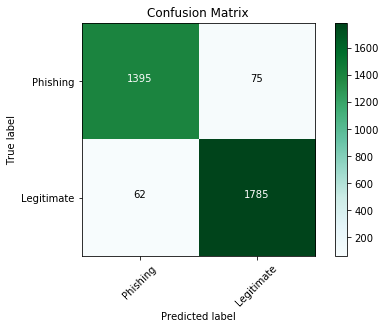

Results on Training data:
Accuracy:  0.990049108297
             precision    recall  f1-score   support

         -1     0.9866    0.9910    0.9888      3428
          1     0.9928    0.9893    0.9911      4310

avg / total     0.9901    0.9900    0.9901      7738
 

Results on Testing data:
Accuracy:  0.95869761833
             precision    recall  f1-score   support

         -1     0.9574    0.9490    0.9532      1470
          1     0.9597    0.9664    0.9630      1847

avg / total     0.9587    0.9587    0.9587      3317



In [34]:
knn = KNeighborsClassifier(n_neighbors = 6, n_jobs = -1, weights = "distance", algorithm = "brute", p = 1)
knn.fit(train_data,train_target)
prediction_train_knn = knn.predict(train_data)
prediction_test_knn = knn.predict(test_data)
completeConfusionMatrix(test_target, prediction_test_knn, False)
# Error metrics
reportGenerator(train_target, prediction_train_knn, test_target, prediction_test_knn)

### K-NN Classifier with distance as Euclidean

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


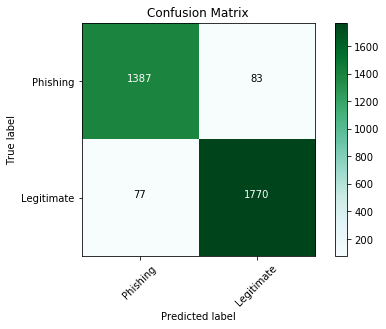

Results on Training data:
Accuracy:  0.990178340657
             precision    recall  f1-score   support

         -1     0.9878    0.9901    0.9889      3428
          1     0.9921    0.9903    0.9912      4310

avg / total     0.9902    0.9902    0.9902      7738
 

Results on Testing data:
Accuracy:  0.951763641845
             precision    recall  f1-score   support

         -1     0.9474    0.9435    0.9455      1470
          1     0.9552    0.9583    0.9568      1847

avg / total     0.9517    0.9518    0.9518      3317



In [35]:
knn = KNeighborsClassifier(n_neighbors = 6, n_jobs = -1, weights = "distance", algorithm = "brute", p = 2)
knn.fit(train_data,train_target)
prediction_train_knn = knn.predict(train_data)
prediction_test_knn = knn.predict(test_data)
completeConfusionMatrix(test_target, prediction_test_knn, False)
# Error metrics
reportGenerator(train_target, prediction_train_knn, test_target, prediction_test_knn)

### K-NN Classifier with distance as Hamming 

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


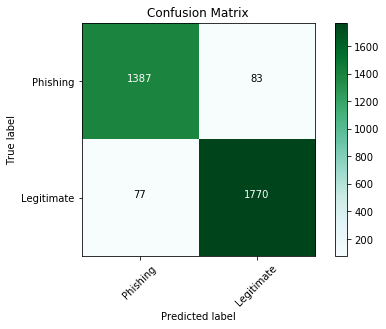

Results on Training data:
Accuracy:  0.990178340657
             precision    recall  f1-score   support

         -1     0.9878    0.9901    0.9889      3428
          1     0.9921    0.9903    0.9912      4310

avg / total     0.9902    0.9902    0.9902      7738
 

Results on Testing data:
Accuracy:  0.964124208622
             precision    recall  f1-score   support

         -1     0.9630    0.9558    0.9594      1470
          1     0.9650    0.9708    0.9679      1847

avg / total     0.9641    0.9641    0.9641      3317



In [36]:
knn = KNeighborsClassifier(n_neighbors = 6, n_jobs = -1, weights = "distance", algorithm = "brute", p = 0, metric = 'hamming')
knn.fit(train_data,train_target)
prediction__train_knn2 = knn.predict(train_data)
prediction_test_knn2 = knn.predict(test_data)
completeConfusionMatrix(test_target, prediction_test_knn, False)
# Error metrics
reportGenerator(train_target, prediction__train_knn2, test_target, prediction_test_knn2)

### K-NN Classifier with distance as Hamming and the 13 important features selected from  ANOVA F-value

In [37]:
training_accuracy_knn = []
test_accuracy_knn = []
neighbors_settings = range(1,15)


In [38]:
for n_neighbors in neighbors_settings:
    knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors, n_jobs = -1, weights = "distance", algorithm = "brute", p = 0, metric = 'hamming')
    knn_clf.fit(train_data_sel,train_target)
    training_accuracy_knn.append(knn_clf.score(train_data_sel,train_target))
    test_accuracy_knn.append(knn_clf.score(test_data_sel,test_target))

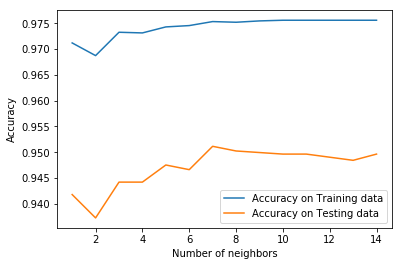

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(neighbors_settings, training_accuracy_knn, label = "Accuracy on Training data")
plt.plot(neighbors_settings, test_accuracy_knn, label = "Accuracy on Testing data")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.legend()

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


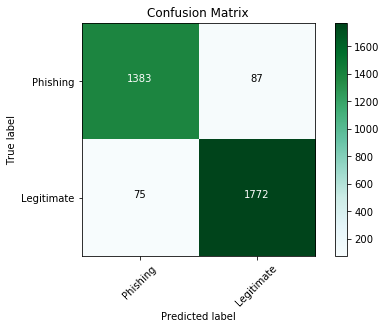

Results on Training data:
Accuracy:  0.975316619281
             precision    recall  f1-score   support

         -1     0.9762    0.9679    0.9720      3428
          1     0.9746    0.9812    0.9779      4310

avg / total     0.9753    0.9753    0.9753      7738
 

Results on Testing data:
Accuracy:  0.951160687368
             precision    recall  f1-score   support

         -1     0.9486    0.9408    0.9447      1470
          1     0.9532    0.9594    0.9563      1847

avg / total     0.9511    0.9512    0.9511      3317



In [40]:
knn = KNeighborsClassifier(n_neighbors = 7, n_jobs = -1, weights = "distance", algorithm = "brute", p = 0, metric = 'hamming')
knn.fit(train_data_sel,train_target)
prediction_train_knn3 = knn.predict(train_data_sel)
prediction_test_knn3 = knn.predict(test_data_sel)
completeConfusionMatrix(test_target, prediction_test_knn3, False)
# Error metrics
reportGenerator(train_target, prediction_train_knn3, test_target, prediction_test_knn3)

# 6. Support Vector Machine Classification

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


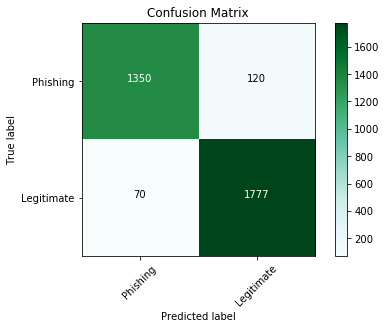

Results on Training data:
Accuracy:  0.951537865081
             precision    recall  f1-score   support

         -1     0.9580    0.9314    0.9445      3428
          1     0.9467    0.9675    0.9570      4310

avg / total     0.9517    0.9515    0.9515      7738
 

Results on Testing data:
Accuracy:  0.942719324691
             precision    recall  f1-score   support

         -1     0.9507    0.9184    0.9343      1470
          1     0.9367    0.9621    0.9493      1847

avg / total     0.9429    0.9427    0.9426      3317



In [41]:
# Support Vector Machine Classification
svm1 = SVC()
svm1.fit(train_data,train_target)
predicted_train_svm1 = svm1.predict(train_data)
predicted_test_svm1 = svm1.predict(test_data)
completeConfusionMatrix(test_target, predicted_test_svm1, False)
# Error metrics
reportGenerator(train_target, predicted_train_svm1, test_target, predicted_test_svm1)

In [42]:
# Tuning Support Vector Machines with GridSearchCV

parameter_values = [
  {'C': [35, 40], 'gamma': [0.1], 'kernel': ['rbf'], 'degree':[1, 2, 3]},
  {'C': [35,40], 'gamma': [ 0.1], 'kernel': ['poly'], 'degree':[3, 4]}
]
svm_grid = GridSearchCV(estimator= SVC(), param_grid=parameter_values, n_jobs=-1, cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=50))
svm_grid.fit(train_data,train_target) 


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'C': [35, 40], 'gamma': [0.1], 'kernel': ['rbf'], 'degree': [1, 2, 3]}, {'C': [35, 40], 'gamma': [0.1], 'kernel': ['poly'], 'degree': [3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
print(svm_grid.best_estimator_)

SVC(C=35, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [44]:
### Creating the SVM Classifier based on the Grid search results

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


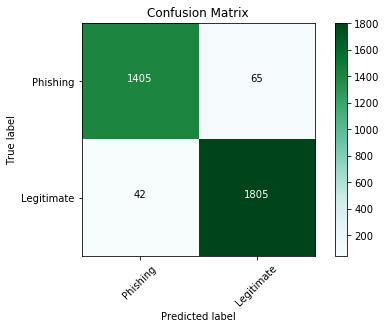

Results on Training data:
Accuracy:  0.988627552339
             precision    recall  f1-score   support

         -1     0.9950    0.9793    0.9871      3428
          1     0.9837    0.9961    0.9899      4310

avg / total     0.9887    0.9886    0.9886      7738
 

Results on Testing data:
Accuracy:  0.967741935484
             precision    recall  f1-score   support

         -1     0.9710    0.9558    0.9633      1470
          1     0.9652    0.9773    0.9712      1847

avg / total     0.9678    0.9677    0.9677      3317

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


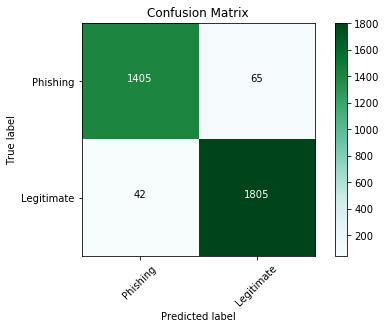

Results on Training data:
Accuracy:  0.988627552339
             precision    recall  f1-score   support

         -1     0.9950    0.9793    0.9871      3428
          1     0.9837    0.9961    0.9899      4310

avg / total     0.9887    0.9886    0.9886      7738
 

Results on Testing data:
Accuracy:  0.967741935484
             precision    recall  f1-score   support

         -1     0.9710    0.9558    0.9633      1470
          1     0.9652    0.9773    0.9712      1847

avg / total     0.9678    0.9677    0.9677      3317



In [45]:
svm2 = SVC(kernel='rbf', gamma=0.1, C=35, degree = 1)
svm2.fit(train_data,train_target)
predicted_train_svm2 = svm2.predict(train_data)
predicted_test_svm2 = svm2.predict(test_data)
completeConfusionMatrix(test_target, predicted_test_svm2, False)
# Error metrics
reportGenerator(train_target, predicted_train_svm2, test_target, predicted_test_svm2)

# SVM with Cross validation
parameter_values = [
  {'C': [35], 'gamma': [0.1], 'kernel': ['rbf'], 'degree':[1]}
]
svm3_grid = GridSearchCV(estimator= SVC(),param_grid=parameter_values, n_jobs=-1, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50))
svm3_grid.fit(train_data,train_target) 
predicted_train_svm3 = svm3_grid.predict(train_data)
predicted_test_svm3 = svm3_grid.predict(test_data)
completeConfusionMatrix(test_target, predicted_test_svm3, False)
# Error metrics
reportGenerator(train_target, predicted_train_svm3, test_target, predicted_test_svm3)

### SVM with Cross validation on the 13 important variables selected from the ANOVA F-value

*************************************
*                                   *
*         Confusion Matrix          *
*                                   *
*************************************


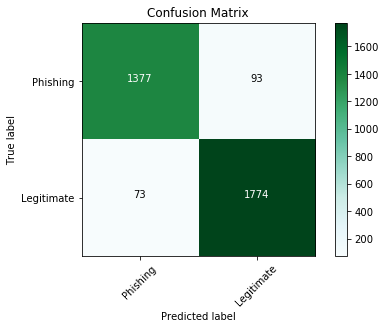

Results on Training data:
Accuracy:  0.970922719049
             precision    recall  f1-score   support

         -1     0.9737    0.9603    0.9670      3428
          1     0.9688    0.9794    0.9740      4310

avg / total     0.9710    0.9709    0.9709      7738
 

Results on Testing data:
Accuracy:  0.949954778414
             precision    recall  f1-score   support

         -1     0.9497    0.9367    0.9432      1470
          1     0.9502    0.9605    0.9553      1847

avg / total     0.9500    0.9500    0.9499      3317



In [46]:
# SVM with Cross validation
parameter_values = [
  {'C': [35], 'gamma': [0.1], 'kernel': ['rbf'], 'degree':[1]}
]
svm4_grid = GridSearchCV(estimator= SVC(),param_grid=parameter_values, n_jobs=-1, cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=50))
svm4_grid.fit(train_data_sel,train_target) 
predicted_train_svm4 = svm4_grid.predict(train_data_sel)
predicted_test_svm4 = svm4_grid.predict(test_data_sel)
completeConfusionMatrix(test_target, predicted_test_svm4, False)
# Error metrics
reportGenerator(train_target, predicted_train_svm4, test_target, predicted_test_svm4)